# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
import requests 
import json
import random
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## Generate Cities List

In [13]:
lat = []
lng = []
cities = []

i = 0 #lat index
j = 0 #lng index

for x in range(1500):
    r_lat = random.uniform(-90, 90)
    lat.append(r_lat)
    r_lng = random.uniform(-180, 180)
    lng.append(r_lng)
    
    city = citipy.nearest_city(lat[i],lng[j])
    name_city = city.city_name
    if name_city not in cities:
        cities.append(name_city)
    i=i+1
    j=j+1

len(cities)      

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
from config import weather_api_key

url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

new_cities = []
new_lat = []
new_lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

n = 1
for city in cities:    
    try:
        query_url = f'{url}{city}&appid={weather_api_key}&units={units}'
        response = requests.get(query_url).json()
        print('City number '+ str(n) +': ' + response['name'])
        n = n + 1
        new_cities.append(response['name'])
        new_lat.append(response['coord']['lat'])
        new_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print('City not found. Skipping...')             

City number 1: Puerto Ayora
City number 2: Mogadishu
City number 3: Asău
City number 4: Busselton
City number 5: Rojhan
City number 6: Dingle
City number 7: Lüderitz
City number 8: Bismarck
City not found. Skipping...
City number 9: Jamestown
City number 10: Rikitea
City number 11: Ankara
City number 12: Adrar
City number 13: Mataura
City number 14: Ushuaia
City number 15: Kapaa
City number 16: Tianpeng
City number 17: Bethel
City number 18: Bolitoc
City number 19: Miraflores
City not found. Skipping...
City number 20: Harper
City number 21: Albany
City not found. Skipping...
City number 22: Murray Bridge
City number 23: Hobart
City number 24: Lima
City number 25: São Miguel do Araguaia
City not found. Skipping...
City not found. Skipping...
City number 26: Cape Town
City number 27: Santa Cruz de la Sierra
City number 28: Hilo
City number 29: Bluff
City number 30: Kendal
City number 31: Airai
City number 32: Vila
City number 33: Lavrentiya
City number 34: Tuatapere
City number 35: Tala

City not found. Skipping...
City number 281: Oshikango
City number 282: Murdochville
City number 283: Banff
City number 284: Durango
City number 285: Singkang
City number 286: Touros
City number 287: Ilulissat
City number 288: Fortuna
City number 289: Adana Province
City number 290: Tautira
City number 291: Okhotsk
City number 292: Senador José Porfírio
City number 293: Nishihara
City number 294: Krasnoshchekovo
City number 295: Maniwaki
City number 296: Berlevåg
City number 297: Dwārka
City number 298: Kamaishi
City number 299: Imbituba
City number 300: Solnechnyy
City number 301: Ocós
City number 302: Mar del Plata
City number 303: Marzuq
City number 304: Santiago del Estero
City number 305: Rawson
City number 306: Merauke
City number 307: Sørland
City number 308: Makat
City number 309: Katangli
City number 310: Cherskiy
City number 311: Longyearbyen
City not found. Skipping...
City number 312: Faanui
City number 313: Luau
City number 314: Ivanteyevka
City number 315: Tupik
City numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
city_weather_df = pd.DataFrame({'City' : new_cities, 
                                'Lat' : new_lat, 
                                'Lng' : new_lng, 
                                'Max Temp' : max_temp,
                                'Humidity' : humidity,
                                'Cloudiness' : cloudiness,
                                'Wind Speed' : wind_speed,
                                'Country' : country,
                                'Date' : date})
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,74.55,86,41,7.00,EC,1622332964
1,Mogadishu,2.0371,45.3438,78.17,84,82,12.64,SO,1622332964
2,Asău,46.4333,26.4000,54.52,99,87,1.90,RO,1622332964
3,Busselton,-33.6500,115.3333,53.10,84,95,19.75,AU,1622332965
4,Rojhan,28.6868,69.9534,91.92,44,0,11.16,PK,1622332965


In [56]:
city_weather_df.to_csv('Output/city_weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.835258,22.208269,63.793518,70.616071,58.966071,7.719804,1.622333e+09
std,33.421559,91.001795,15.884735,21.060542,36.439534,5.734540,8.937158e+01
min,-54.800000,-175.200000,19.690000,4.000000,0.000000,0.000000,1.622333e+09
25%,-6.477900,-60.654175,51.055000,60.000000,22.750000,3.552500,1.622333e+09
50%,26.108750,24.740700,63.760000,76.000000,67.500000,6.590000,1.622333e+09
75%,49.515025,104.024475,77.767500,86.000000,95.000000,10.330000,1.622333e+09
max,78.218600,179.316700,101.070000,100.000000,100.000000,38.970000,1.622333e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

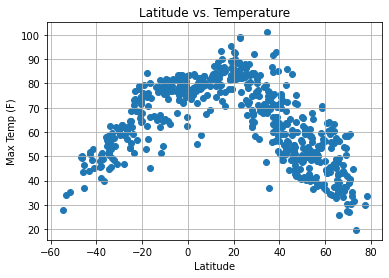

In [60]:
x_axis_lt = city_weather_df['Lat']
y_axis_lt = city_weather_df['Max Temp']

plt.scatter(x_axis_lt, y_axis_lt)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Temperature')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

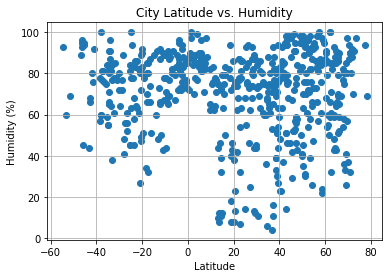

In [61]:
x_axis_lh = city_weather_df['Lat']
y_axis_lh = city_weather_df['Humidity']

plt.scatter(x_axis_lh, y_axis_lh)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

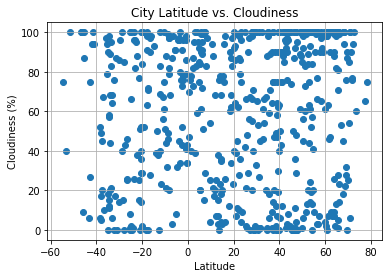

In [62]:
x_axis_lc = city_weather_df['Lat']
y_axis_lc = city_weather_df['Cloudiness']

plt.scatter(x_axis_lc, y_axis_lc)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

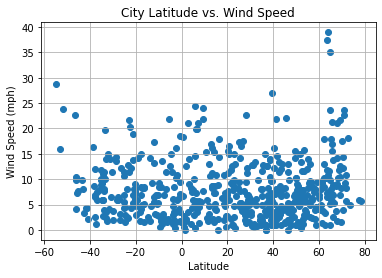

In [63]:
x_axis_lw = city_weather_df['Lat']
y_axis_lw = city_weather_df['Wind Speed']

plt.scatter(x_axis_lw, y_axis_lw)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude')

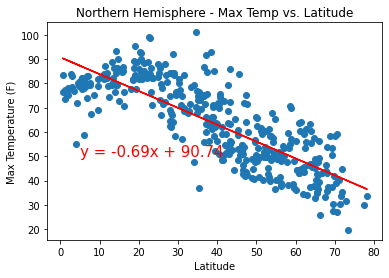

In [94]:
x_axis_lt_N = city_weather_df[city_weather_df['Lat'] >= 0]['Lat']
y_axis_lt_N = city_weather_df[city_weather_df['Lat'] >= 0]['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lt_N, y_axis_lt_N)
ltr_regress_values = x_axis_lt_N * slope + intercept
ltr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lt_N, y_axis_lt_N)
plt.plot(x_axis_lt_N, ltr_regress_values, c = 'r')
plt.annotate(ltr_line_eq,(5,50), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude')

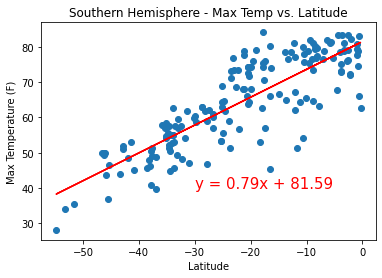

In [95]:
x_axis_lt_S = city_weather_df[city_weather_df['Lat'] < 0]['Lat']
y_axis_lt_S = city_weather_df[city_weather_df['Lat'] < 0]['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lt_S, y_axis_lt_S)
ltr_regress_values = x_axis_lt_S * slope + intercept
ltr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lt_S, y_axis_lt_S)
plt.plot(x_axis_lt_S, ltr_regress_values, c = 'r')
plt.annotate(ltr_line_eq,(-30,40), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs. Latitude')

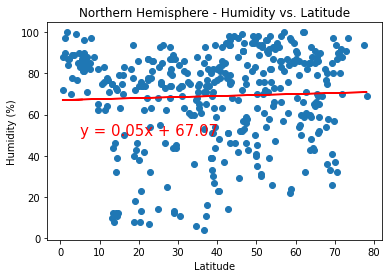

In [100]:
x_axis_lh_N = city_weather_df[city_weather_df['Lat'] >= 0]['Lat']
y_axis_lh_N = city_weather_df[city_weather_df['Lat'] >= 0]['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lh_N, y_axis_lh_N)
lhr_regress_values = x_axis_lt_N * slope + intercept
lhr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lh_N, y_axis_lh_N)
plt.plot(x_axis_lh_N, lhr_regress_values, c = 'r')
plt.annotate(lhr_line_eq,(5,50), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Humidity vs. Latitude')

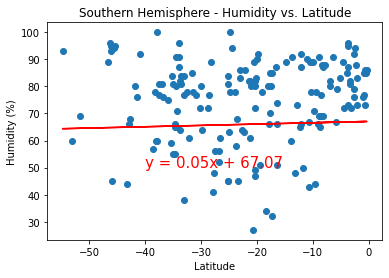

In [101]:
x_axis_lh_S = city_weather_df[city_weather_df['Lat'] < 0]['Lat']
y_axis_lh_S = city_weather_df[city_weather_df['Lat'] < 0]['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lh_N, y_axis_lh_N)
lhr_regress_values = x_axis_lt_S * slope + intercept
lhr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lh_S, y_axis_lh_S)
plt.plot(x_axis_lh_S, lhr_regress_values, c = 'r')
plt.annotate(lhr_line_eq,(-40,50), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs. Latitude')

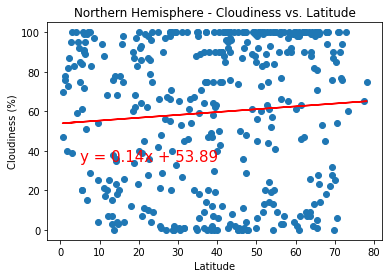

In [105]:
x_axis_lc_N = city_weather_df[city_weather_df['Lat'] >= 0]['Lat']
y_axis_lc_N = city_weather_df[city_weather_df['Lat'] >= 0]['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lc_N, y_axis_lc_N)
lcr_regress_values = x_axis_lc_N * slope + intercept
lcr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lc_N, y_axis_lc_N)
plt.plot(x_axis_lc_N, lcr_regress_values, c = 'r')
plt.annotate(lcr_line_eq,(5,35), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs. Latitude')

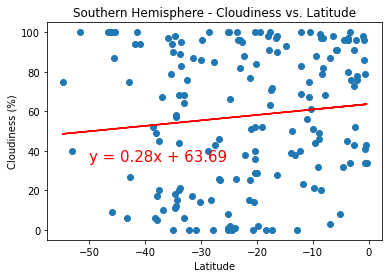

In [108]:
x_axis_lc_S = city_weather_df[city_weather_df['Lat'] < 0]['Lat']
y_axis_lc_S = city_weather_df[city_weather_df['Lat'] < 0]['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lc_S, y_axis_lc_S)
lcr_regress_values = x_axis_lc_S * slope + intercept
lcr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lc_S, y_axis_lc_S)
plt.plot(x_axis_lc_S, lcr_regress_values, c = 'r')
plt.annotate(lcr_line_eq,(-50,35), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs. Latitude')

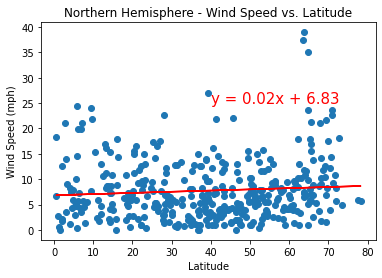

In [109]:
x_axis_lw_N = city_weather_df[city_weather_df['Lat'] >= 0]['Lat']
y_axis_lw_N = city_weather_df[city_weather_df['Lat'] >= 0]['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lw_N, y_axis_lw_N)
lwr_regress_values = x_axis_lw_N * slope + intercept
lwr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lw_N, y_axis_lw_N)
plt.plot(x_axis_lw_N, lwr_regress_values, c = 'r')
plt.annotate(lwr_line_eq,(40,25), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs. Latitude')

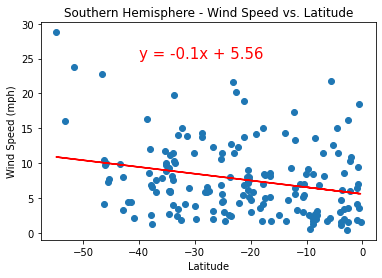

In [113]:
x_axis_lw_S = city_weather_df[city_weather_df['Lat'] < 0]['Lat']
y_axis_lw_S = city_weather_df[city_weather_df['Lat'] < 0]['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis_lw_S, y_axis_lw_S)
lwr_regress_values = x_axis_lw_S * slope + intercept
lwr_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_lw_S, y_axis_lw_S)
plt.plot(x_axis_lw_S, lwr_regress_values, c = 'r')
plt.annotate(lwr_line_eq,(-40,25), c = 'r', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')